In [3]:
import pickle
# Bugfix thanks to: http://stackoverflow.com/questions/11305790/pickle-incompatability-of-numpy-arrays-between-python-2-and-3 
def unpickle(filename):
    with open(filename, 'rb') as fo: 
        return pickle.load(fo, encoding='latin1')

In [4]:
import os
import numpy as np 

data_folder = "/home/robert/data/datasets/cifar-10-batches-py/"

batches = [] 
for i in range(1, 6):
    batch_filename = os.path.join(data_folder, "data_batch_{}".format(i))
    batches.append(unpickle(batch_filename)) 
    #break

In [6]:
len(batches)

5

In [7]:
X = np.vstack([batch['data'] for batch in batches])

In [8]:
X.shape

(50000, 3072)

In [9]:
X = np.array(X) / X.max() 
X = X.astype(np.float32)

In [10]:
from keras.utils import np_utils
y = np.hstack(batch['labels'] for batch in batches).flatten()
nb_classes = len(np.unique(y))
y = np_utils.to_categorical(y, nb_classes)

In [6]:
X.shape, y.shape

((50000, 3072), (50000, 10))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
X_train.shape, y_train.shape

((40000, 3072), (40000, 10))

In [9]:
np_utils.to_categorical?

In [10]:
#y_train = np_utils.to_categorical(y_train, nb_classes)
#y_test = np_utils.to_categorical(y_test, nb_classes)

In [11]:
X_train.shape, y_train.shape

((40000, 3072), (40000, 10))

In [12]:
X_test.shape, y_test.shape

((10000, 3072), (10000, 10))

In [14]:
X_train = X_train.reshape(-1, 3, 32, 32)
X_test = X_test.reshape(-1, 3, 32, 32)

In [15]:
X_train.shape, X_test.shape

((40000, 3, 32, 32), (10000, 3, 32, 32))

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D

In [17]:
n_samples, d, h, w = X_train.shape

In [18]:
X_train.shape[1:], (d, h, w)

((3, 32, 32), (3, 32, 32))

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
nb_classes

10

In [21]:
conv1 = Convolution2D(32, 3, 3, input_shape=(d, h, w))
pool1 = MaxPooling2D()
conv2 = Convolution2D(64, 2, 2)
pool2 = MaxPooling2D()
conv3 = Convolution2D(128, 2, 2)
pool3 = MaxPooling2D()
flatten = Flatten()
hidden4 = Dense(500)
hidden5 = Dense(500)
output = Dense(nb_classes)  # softmax?
layers = [conv1, pool1,
          conv2, pool2,
          conv3, pool3,
          flatten, hidden4, hidden5,
          output]

In [22]:
model = Sequential(layers=layers)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [21]:
#from pprint import pprint
#import json
#pprint(json.loads(model.to_json()))

In [23]:
import tensorflow as tf

history = model.fit(X_train, y_train, nb_epoch=1, verbose=False,
                   validation_data=(X_test, y_test))

In [23]:
%matplotlib inline

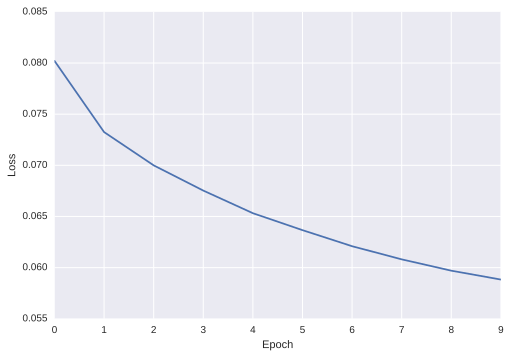

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [25]:
#from keras.datasets import cifar10
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#y_train = np_utils.to_categorical(y_train, nb_classes)

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred.argmax(axis=1),
                            y_true=y_test.argmax(axis=1)))

             precision    recall  f1-score   support

          0       0.69      0.59      0.64      1024
          1       0.72      0.81      0.76      1065
          2       0.69      0.29      0.41       993
          3       0.44      0.49      0.46       961
          4       0.54      0.60      0.57      1007
          5       0.64      0.43      0.52       972
          6       0.60      0.73      0.66       959
          7       0.60      0.76      0.67       974
          8       0.59      0.83      0.69      1028
          9       0.77      0.62      0.68      1017

avg / total       0.63      0.62      0.61     10000



In [2]:
import keras

keras.__version__

'1.2.1'